In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:
import os
try:
	os.chdir(os.path.join(os.getcwd(), '3_ia'))
except:
	pass

 # Algoritmo de IA – KNN
 ### Noel Viscome Eliezer

In [2]:
import pandas as pd
import numpy as np

 Vamos importar e tratar os dados do dataset para a análise. Como a quantidade de amostras é pequena (< 600), iremos usar todas as entradas.

In [3]:
cancer_data = pd.read_csv('data.csv')
cancer_data = cancer_data.dropna(how='all', axis='columns') #coluna Unnamed com NaN criada por algum motivo? dropamos para garantir a consistência dos dados

In [4]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


 Para essa análise, utilizaremos todas as features numéricas do dataset. Queremos prever o diagnóstico (*M*aligno, *B*enigno) através das diversas características descritas.

In [6]:
X = cancer_data.drop(['id', 'diagnosis'], axis=1) 
y = cancer_data['diagnosis']

 Agora criamos um modelo simples de classificação usando os 5 pontos mais próximos, e usaremos validação cruzada para analisar sua precisão (0.000 a 1.000).

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, scoring = 'accuracy', cv = 10)
print("Precisão para cada iteração: ", scores)
print("Média: ", scores.mean())

Precisão para cada iteração:  [0.9137931  0.87931034 0.89473684 0.96491228 0.94736842 0.92982456
 0.96491228 0.92857143 0.91071429 0.96428571]
Média:  0.9298429262812202


 Para melhorar o processo anterior, usaremos GridSearch para fazer a validação cruzada com diferentes valores para K. Com isso, podemos escolher o valor ideal de K para obter a melhor precisão para análise.

In [8]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1,31))
param_grid = dict(n_neighbors = k_range)
grid = GridSearchCV(knn, param_grid, scoring ='accuracy', cv = 10, return_train_score = False, iid = True)
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

 Vamos plotar em um gráfico os diferentes valores para a média da precisão para cada valor de K.

Text(0, 0.5, 'Cross Validated Accuracy')

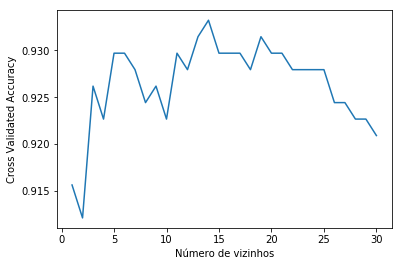

In [9]:
import matplotlib.pyplot as plt
grid_mean_scores = grid.cv_results_.get('mean_test_score')
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Número de vizinhos')
plt.ylabel('Cross Validated Accuracy')

 Finalmente, podemos ver abaixo o parâmetro com melhor precisão.

In [10]:
print(grid.best_params_)

{'n_neighbors': 14}
